In [2]:
from sklearn.datasets import make_blobs 
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense 
from matplotlib import pyplot

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)

In [4]:
y=to_categorical(y)

In [6]:
n_train=800
train_X,test_X=X[:n_train,:],X[n_train:,:]
train_y,test_y=y[:n_train],y[n_train:]
print(train_X.shape,test_X.shape)
print(train_y.shape,test_y.shape)

(800, 2) (200, 2)
(800, 3) (200, 3)


In [9]:
model = Sequential()
model.add(Dense(25,input_dim=2,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/Users/baijuyadav/Desktop/deeplearningfromscratch/deeplearningscratch/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=1000,verbose=1)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3713 - loss: 1.2309 - val_accuracy: 0.3950 - val_loss: 1.0101
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4087 - loss: 0.9723 - val_accuracy: 0.5150 - val_loss: 0.8833
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5288 - loss: 0.8759 - val_accuracy: 0.5850 - val_loss: 0.7944
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5875 - loss: 0.8094 - val_accuracy: 0.6600 - val_loss: 0.7362
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6212 - loss: 0.7597 - val_accuracy: 0.7050 - val_loss: 0.6903
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6675 - loss: 0.7219 - val_accuracy: 0.7350 - val_loss: 0.6534
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 0.6926 - val_accuracy: 0.7500 - val_loss: 0.6220
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.6677 - val_accuracy: 0.

In [13]:
train_loss,train_accuracy = model.evaluate(train_X,train_y)
test_loss,test_accuracy = model.evaluate(test_X,test_y)
print(f"train loss: {train_loss}, train accuracy: {train_accuracy*100}")
print(f"test loss : {test_loss}, test accuracy: {test_accuracy*100}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8313 - loss: 0.3898
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8350 - loss: 0.3570
train loss: 0.3897736370563507, train accuracy: 83.1250011920929
test loss : 0.3570188283920288, test accuracy: 83.49999785423279


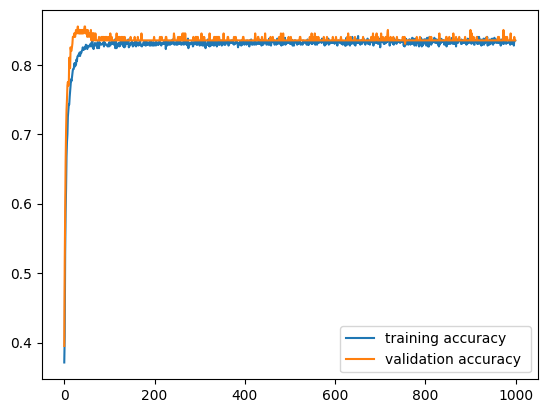

In [16]:
pyplot.plot(history.history['accuracy'],label=['training accuracy '])
pyplot.plot(history.history['val_accuracy'],label=['validation accuracy '])
pyplot.legend()
pyplot.show()